<a href="https://colab.research.google.com/github/PhuongAnh2212/ENG202LidarData/blob/main/Assignment2_Individual_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Lidar1.csv')
df = pd.read_csv('/content/Lidar2.csv')
df = pd.read_csv('/content/Lidar3.csv')

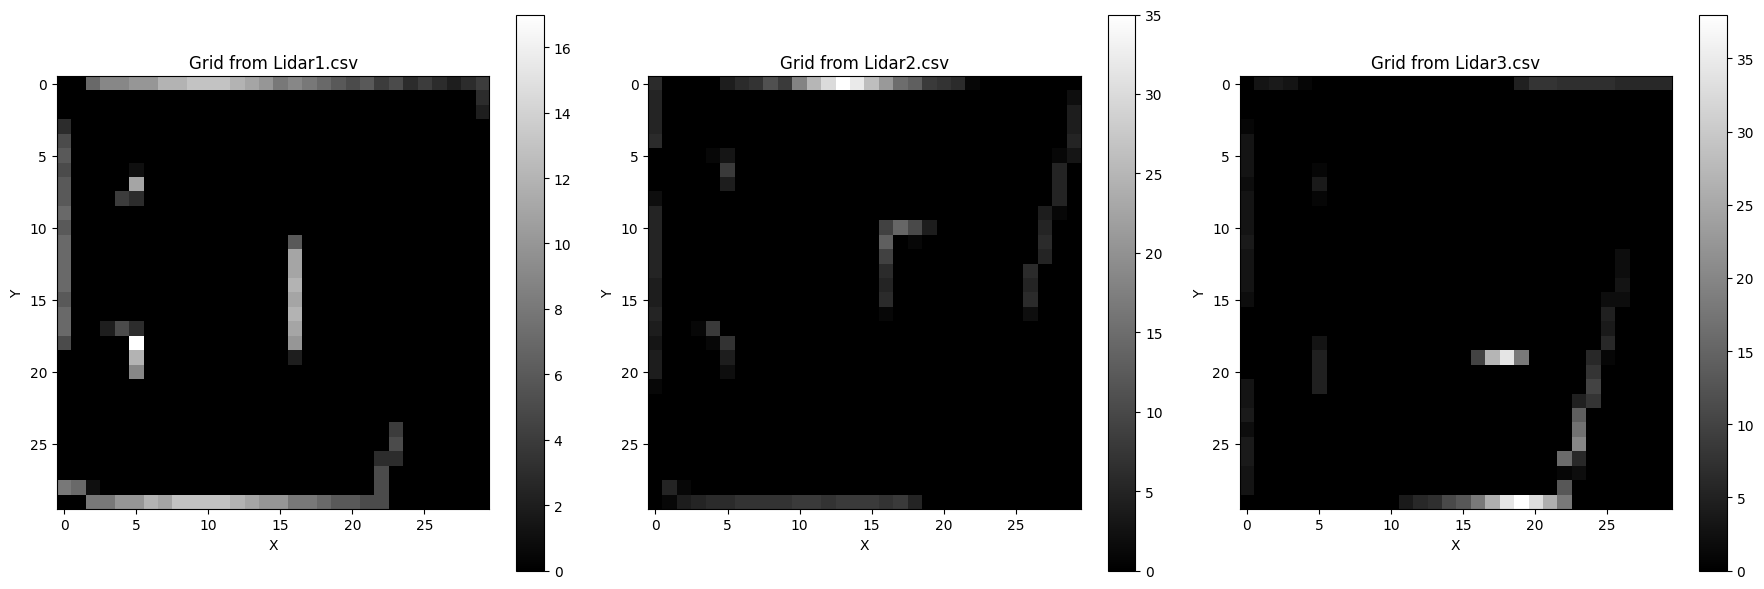

In [13]:
def process_data(file_name):
    df = pd.read_csv(file_name)
    x = df['x'].values
    y = df['y'].values
    x_grid = np.clip(np.floor((x - min(x)) / (max(x) - min(x)) * 30), 0, 29).astype(int)
    y_grid = np.clip(np.floor((y - min(y)) / (max(y) - min(y)) * 30), 0, 29).astype(int)
    grid = np.zeros((30, 30))

    for i in range(len(x_grid)):
        grid[y_grid[i], x_grid[i]] += 1

    return grid

files = ['Lidar1.csv', 'Lidar2.csv', 'Lidar3.csv']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, file in enumerate(files):
    grid = process_data(file)
    ax = axes[i]
    cax = ax.imshow(grid, cmap='gray', interpolation='nearest')
    ax.set_title(f'Grid from {file}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    fig.colorbar(cax, ax=ax, orientation='vertical')

plt.tight_layout()
plt.show()


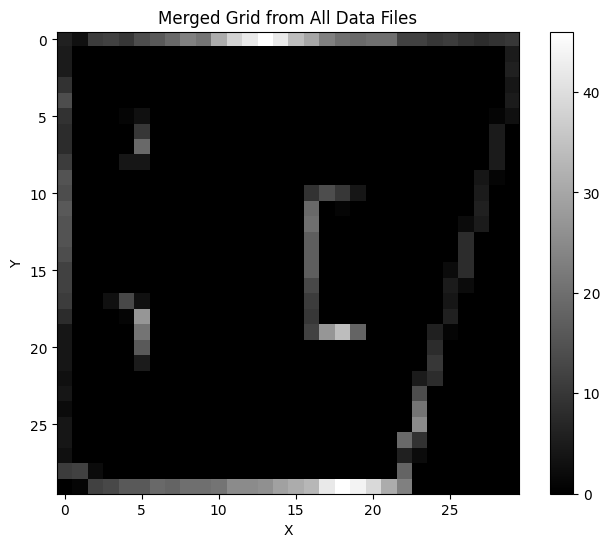

In [15]:
def process_data(file_name):
    df = pd.read_csv(file_name)
    x = df['x'].values
    y = df['y'].values
    x_grid = np.clip(np.floor((x - min(x)) / (max(x) - min(x)) * 30), 0, 29).astype(int)
    y_grid = np.clip(np.floor((y - min(y)) / (max(y) - min(y)) * 30), 0, 29).astype(int)

    grid = np.zeros((30, 30))

    for i in range(len(x_grid)):
        grid[y_grid[i], x_grid[i]] += 1

    return grid

files = ['Lidar1.csv', 'Lidar2.csv', 'Lidar3.csv']

merged_grid = np.zeros((30, 30))

for file in files:
    grid = process_data(file)
    merged_grid += grid

plt.figure(figsize=(8, 6))
cax = plt.imshow(merged_grid, cmap='gray', interpolation='nearest')
plt.title('Merged Grid from All Data Files')
plt.xlabel('X')
plt.ylabel('Y')

plt.colorbar(cax, orientation='vertical')
plt.show()